##  Project 2, Part 2: Web Scraped Data Analysis and Visualizations

**Name: Denilson Wilson Aguilar Molina**

**Date: 04/02/2024**

In [1]:
#importing packages
import requests as r
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Grabbing the URL of the Wikipedia page
response = r.get("https://en.wikipedia.org/wiki/List_of_Netflix_original_films_(2022)")

# The Converts It Into Text
wiki_text =response.text

# This the html content
soup = BeautifulSoup(wiki_text, 'html.parser')

# This finds the table containg the film data, I had to inspect the code to find this
feature_films_heading = soup.find('span', {'id': 'Feature_films'})

# This finds and uses the parent element of the heading.
if feature_films_heading:
    parent_element = feature_films_heading.find_parent()
        
# This finds the first table within the parent element, since it's the one i'll be using
    required_table = parent_element.find_next_sibling('table', class_='wikitable sortable')

    # This looks for the headers of the rows since they start with th
    header_tags = required_table.find_all('th')
    headers = [header.text.strip() for header in header_tags]
    print(headers)  # This would print the headers of the rows

    # This extracts the data rows
    rows = []

    # This searches for all tr of the table
    data_rows = required_table.find_all('tr')

    # This displays the extracted rows from the site
    for row in data_rows[1:]:
        value = row.find_all('td')
        beautified_value = [dp.text.strip() for dp in value]
        print(beautified_value)

    # This finds other tables affiliated with the "Feature films" section
    other_tables = []
    sibling = required_table.find_next_sibling()
    while sibling and sibling.name == 'table':
        other_tables.append(sibling)
        sibling = sibling.find_next_sibling()

    # This prints the content of the other tables (for demonstration purposes)
    for other_table in other_tables:
        header_tags = other_table.find_all('th')
        headers = [header.text.strip() for header in header_tags]
        print(headers)  # This would print the headers of the rows

        # This extracts the data rows
        rows = []

        # This searches for all tr of the table
        data_rows = other_table.find_all('tr')

        # This displays the extracted rows from the site
        for row in data_rows[1:]:
            value = row.find_all('td')
            beautified_value = [dp.text.strip() for dp in value]
            print(beautified_value)
else:
    print("Feature films section not found.") #This was included just because I KEEP RUNNING INTO AN ISSUE WHERE I COULDN'T GRAB THE CODE FRON THE SITE ITSELF.

['Title', 'Genre', 'Premiere', 'Runtime', 'Language']
['Four to Dinner', 'Romantic comedy', 'January 5, 2022', '1 h 30 min', 'Italian']
['The Wasteland', 'Horror', 'January 6, 2022', '1 h 32 min', 'Spanish']
['How I Fell in Love with a Gangster', 'Drama', 'January 12, 2022', '2 h 59 min', 'Polish']
['Brazen', 'Romantic thriller', 'January 13, 2022', '1 h 36 min', 'English']
['Photocopier', 'Coming-of-age drama', 'January 13, 2022', '2 h 10 min', 'Indonesian']
['This Is Not a Comedy', 'Comedy drama', 'January 14, 2022', '1 h 45 min', 'Spanish']
['The Royal Treatment', 'Romance', 'January 20, 2022', '1 h 37 min', 'English']
['Amandla', 'Drama', 'January 21, 2022', '1 h 46 min', 'English']
['Munich – The Edge of War', 'Historical drama / thriller', 'January 21, 2022', '2 h 11 min', 'English']
["My Father's Violin", 'Drama', 'January 21, 2022', '1 h 52 min', 'Turkish']
['Home Team', 'Sports comedy', 'January 28, 2022', '1 h 37 min', 'English']
['Looop Lapeta', 'Romantic thriller', 'Februar

In [3]:
data = [
    ['Four to Dinner', 'Romantic comedy', 'January 5, 2022', '1 h 30 min', 'Italian'],
    ['The Wasteland', 'Horror', 'January 6, 2022', '1 h 32 min', 'Spanish'],
    ['How I Fell in Love with a Gangster', 'Drama', 'January 12, 2022', '2 h 59 min', 'Polish'],
    ['Brazen', 'Romantic thriller', 'January 13, 2022', '1 h 36 min', 'English'],
    ['Photocopier', 'Coming-of-age drama', 'January 13, 2022', '2 h 10 min', 'Indonesian'],
    ['This Is Not a Comedy', 'Comedy drama', 'January 14, 2022', '1 h 45 min', 'Spanish'],
    ['The Royal Treatment', 'Romance', 'January 20, 2022', '1 h 37 min', 'English'],
    ['Amandla', 'Drama', 'January 21, 2022', '1 h 46 min', 'English'],
    ['Munich – The Edge of War', 'Historical drama / thriller', 'January 21, 2022', '2 h 11 min', 'English'],
    ["My Father's Violin", 'Drama', 'January 21, 2022', '1 h 52 min', 'Turkish'],
    ['Home Team', 'Sports comedy', 'January 28, 2022', '1 h 37 min', 'English'],
    ['Looop Lapeta', 'Romantic thriller', 'February 4, 2022', '2 h 11 min', 'Hindi'],
    ['Through My Window', 'Drama', 'February 4, 2022', '1 h 53 min', 'Spanish'],
    ['The Privilege', 'Horror', 'February 9, 2022', '1 h 47 min', 'German'],
    ['Into the Wind', 'Romantic drama', 'February 10, 2022', '1 h 48 min', 'Polish'],
    ['Bigbug', 'Science fiction comedy', 'February 11, 2022', '1 h 51 min', 'French'],
    ['Love and Leashes', 'Romantic comedy', 'February 11, 2022', '1 h 58 min', 'Korean'],
    ['Love Tactics', 'Romantic comedy', 'February 11, 2022', '1 h 38 min', 'Turkish'],
    ['Tall Girl 2', 'Teen romantic comedy', 'February 11, 2022', '1 h 41 min', 'English'],
    ['Fistful of Vengeance', 'Supernatural martial arts drama', 'February 17, 2022', '1 h 36 min', 'English'],
    ['Texas Chainsaw Massacre', 'Slasher', 'February 18, 2022', '1 h 23 min', 'English'],
    ['UFO', 'Drama', 'February 23, 2022', '1 h 50 min', 'Turkish'],
    ['A Madea Homecoming', 'Comedy', 'February 25, 2022', '1 h 47 min', 'English'],
    ['Restless', 'Action thriller', 'February 25, 2022', '1 h 36 min', 'French'],
    ['Against the Ice', 'Survival', 'March 2, 2022', '1 h 43 min', 'English'],
    ['The Weekend Away', 'Thriller', 'March 3, 2022', '1 h 31 min', 'English'],
    ['The Invisible Thread', 'Comedy drama', 'March 4, 2022', '1 h 30 min', 'Italian'],
    ['The Adam Project', 'Science fiction', 'March 11, 2022', '1 h 46 min', 'English'],
    ['Rescued by Ruby', 'Drama', 'March 17, 2022', '1 h 33 min', 'English'],
    ['Black Crab', 'Thriller', 'March 18, 2022', '1 h 54 min', 'Swedish'],
    ['Without Saying Goodbye', 'Romantic comedy', 'March 18, 2022', '1 h 36 min', 'Spanish'],
    ['Windfall', 'Thriller', 'March 18, 2022', '1 h 32 min', 'English'],
    ['In Good Hands', 'Romantic comedy', 'March 21, 2022', '1 h 44 min', 'Turkish'],
    ['Love Like the Falling Petals', 'Drama', 'March 24, 2022', '2 h 9 min', 'Japanese'],
    ['All Hail', 'Drama', 'March 30, 2022', '1 h 58 min', 'Spanish'],
    ['Apollo 10 1⁄2: A Space Age Childhood', 'Animation', 'April 1, 2022', '1 h 38 min', 'English'],
    ['Battle: Freestyle', 'Romantic drama', 'April 1, 2022', '1 h 28 min', 'Norwegian'],
    ['The Bubble', 'Comedy', 'April 1, 2022', '2 h 6 min', 'English'],
    ['Cobalt Blue', 'Romantic drama', 'April 2, 2022', '1 h 52 min', 'Hindi'],
    ['Dancing on Glass', 'Drama', 'April 8, 2022', '2 h 19 min', 'Spanish'],
    ['Metal Lords', 'Musical comedy drama', 'April 8, 2022', '1 h 38 min', 'English'],
    ['Yaksha: Ruthless Operations', 'Spy', 'April 8, 2022', '2 h 5 min', 'Korean'],
    ['The Taming of the Shrewd', 'Comedy', 'April 13, 2022', '1 h 52 min', 'Polish'],
    ['Choose or Die', 'Horror', 'April 15, 2022', '1 h 25 min', 'English'],
    ['Man of God', 'Drama', 'April 16, 2022', '1 h 51 min', 'English'],
    ['The Turning Point', 'Drama', 'April 20, 2022', '1 h 30 min', 'Italian'],
    ['365 Days: This Day', 'Erotic thriller', 'April 27, 2022', '1 h 51 min', 'English'],
    ['Silverton Siege', 'Action thriller', 'April 27, 2022', '1 h 41 min', 'English'],
    ['Bubble', 'Anime', 'April 28, 2022', '1 h 41 min', 'Japanese'],
    ['Honeymoon with My Mother', 'Comedy', 'April 29, 2022', '1 h 50 min', 'Spanish'],
    ['Rumspringa – An Amish in Berlin', 'Comedy', 'April 29, 2022', '1 h 42 min', 'German'],
    ['Along for the Ride', 'Drama', 'May 6, 2022', '1 h 47 min', 'English'],
    ['The Takedown', 'Action comedy', 'May 6, 2022', '2 h 1 min', 'French'],
    ['Thar', 'Western thriller', 'May 6, 2022', '1 h 48 min', 'Hindi'],
    ['Senior Year', 'Comedy', 'May 13, 2022', '1 h 53 min', 'English'],
    ['Toscana', 'Drama', 'May 18, 2022', '1 h 30 min', 'Danish'],
    ['A Perfect Pairing', 'Romantic comedy', 'May 19, 2022', '1 h 42 min', 'English'],
    ['F*ck Love Too', 'Romantic comedy', 'May 20, 2022', '1 h 32 min', 'Dutch'],
    ['Godspeed', 'Drama', 'May 23, 2022', '1 h 59 min', 'Turkish'],
    ['Interceptor', 'Action drama', 'June 3, 2022', '1 h 38 min', 'English'],
    ['Hustle', 'Sports', 'June 8, 2022', '1 h 58 min', 'English'],
    ['Trees of Peace', 'Drama', 'June 10, 2022', '1 h 38 min', 'English'],
    ['Centauro', 'Action thriller', 'June 15, 2022', '1 h 30 min', 'Spanish'],
    ['Heart Parade', 'Romantic comedy', 'June 15, 2022', '1 h 48 min', 'Polish'],
    ['The Wrath of God', 'Thriller', 'June 15, 2022', '1 h 38 min', 'Spanish'],
    ['Spiderhead', 'Science fiction action thriller', 'June 17, 2022', '1 h 47 min', 'English'],
    ['Doom of Love', 'Drama', 'June 20, 2022', '1 h 40 min', 'Turkish'],
    ['Love & Gelato', 'Romance', 'June 22, 2022', '1 h 52 min', 'English'],
    ['Blasted', 'Science fiction / comedy', 'June 28, 2022', '1 h 55 min', 'Norwegian'],
    ['Beauty', 'Drama', 'June 29, 2022', '1 h 35 min', 'English'],
    ['Hello, Goodbye, and Everything in Between', 'Romantic comedy', 'July 6, 2022', '1 h 24 min', 'English'],
    ['Dangerous Liaisons', 'Romantic drama', 'July 8, 2022', '1 h 49 min', 'French'],
    ['Jewel', 'Drama', 'July 8, 2022', '1 h 20 min', 'English'],
    ['The Sea Beast', 'Animated adventure', 'July 8, 2022', '1 h 59 min', 'English'],
    ['For Jojo', 'Drama', 'July 11, 2022', '1 h 30 min', 'German'],
    ['Under the Amalfi Sun', 'Comedy drama', 'July 13, 2022', '1 h 30 min', 'Italian'],
    ['Jaadugar', 'Comedy', 'July 15, 2022', '2 h 47 min', 'Hindi'],
    ['Persuasion', 'Drama', 'July 15, 2022', '1 h 49 min', 'English'],
    ['The Gray Man', 'Spy thriller', 'July 22, 2022', '2 h 9 min', 'English'],
    ['Recurrence', 'Thriller', 'July 27, 2022', '1 h 56 min', 'Spanish'],
    ['A Cut Above', 'Comedy', 'July 28, 2022', '1 h 31 min', 'Portuguese'],
    ['The Entitled', 'Romantic comedy', 'July 29, 2022', '1 h 30 min', 'Filipino'],
    ['Purple Hearts', 'Romance', 'July 29, 2022', '2 h 2 min', 'English'],
    ['Buba', 'Comedy', 'August 3, 2022', '1 h 34 min', 'German'],
    ["Don't Blame Karma!", 'Romantic comedy', 'August 3, 2022', '1 h 25 min', 'Spanish'],
    ['Wedding Season', 'Comedy', 'August 4, 2022', '1 h 37 min', 'English'],
    ['Carter', 'Action', 'August 5, 2022', '2 h 14 min', 'Korean'],
    ['Darlings', 'Comedy drama', 'August 5, 2022', '2 h 14 min', 'Hindi'],
    ['Rise of the Teenage Mutant Ninja Turtles: The Movie', 'Animated action-adventure', 'August 5, 2022', '1 h 22 min', 'English'],
    ['Heartsong', 'Romantic comedy', 'August 10, 2022', '1 h 35 min', 'Turkish'],
    ['13: The Musical', 'Musical', 'August 12, 2022', '1 h 34 min', 'English'],
    ['Day Shift', 'Fantasy comedy', 'August 12, 2022', '1 h 53 min', 'English'],
    ['Look Both Ways', 'Romantic comedy', 'August 17, 2022', '1 h 51 min', 'English'],
    ['Royalteen', 'Coming-of-age', 'August 17, 2022', '1 h 48 min', 'Norwegian'],
    ['The Next 365 Days', 'Erotic thriller', 'August 19, 2022', '1 h 53 min', 'English'],
    ["That's Amor", 'Romantic comedy', 'August 25, 2022', '1 h 36 min', 'English'],
    ['Loving Adults', 'Thriller', 'August 26, 2022', '1 h 45 min', 'Danish'],
    ['Me Time', 'Comedy', 'August 26, 2022', '1 h 44 min', 'English'],
    ['Seoul Vibe', 'Action', 'August 26, 2022', '2 h 20 min', 'Korean'],
    ['I Came By', 'Thriller', 'August 31, 2022', '1 h 50 min', 'English'],
    ['Fenced in', 'Comedy', 'September 1, 2022', '1 h 50 min', 'Portuguese'],
    ['Love in the Villa', 'Romantic comedy', 'September 1, 2022', '1 h 55 min', 'English'],
    ['The Festival of Troubadours', 'Drama', 'September 2, 2022', '1 h 42 min', 'Turkish'],
    ['End of the Road', 'Crime thriller', 'September 9, 2022', '1 h 31 min', 'English'],
    ['No Limit', 'Thriller', 'September 9, 2022', '1 h 58 min', 'French'],
    ['Broad Peak', 'Thriller', 'September 14, 2022', '1 h 42 min', 'Polish'],
    ['Do Revenge', 'Black comedy', 'September 16, 2022', '1 h 58 min', 'English'],
    ['Drifting Home', 'Anime', 'September 16, 2022', '2 h', 'Japanese'],
    ['I Used to Be Famous', 'Musical drama', 'September 16, 2022', '1 h 44 min', 'English'],
    ['Jogi', 'Drama', 'September 16, 2022', '1 h 56 min', 'Hindi'],
    ['The Perfumier', 'Crime drama', 'September 21, 2022', '1 h 36 min', 'German'],
    ["A Jazzman's Blues", 'Drama', 'September 23, 2022', '2 h 8 min', 'English'],
    ['Lou', 'Thriller', 'September 23, 2022', '1 h 47 min', 'English'],
    ['Athena', 'Drama', 'September 23, 2022', '1 h 37 min', 'French'],
    ['Blonde', 'Biographical drama', 'September 28, 2022', '2 h 47 min', 'English'],
    ['Aníkúlápó', 'Fantasy drama', 'September 30, 2022', '2 h 22 min', 'Yoruba'],
    ['Plan A Plan B', 'Romantic comedy', 'September 30, 2022', '1 h 46 min', 'Hindi'],
    ['Rainbow', 'Fantasy drama', 'September 30, 2022', '1 h 58 min', 'Spanish'],
    ['Jumping from High Places', 'Drama', 'October 5, 2022', '1 h 28 min', 'Italian'],
    ["Mr. Harrigan's Phone", 'Horror', 'October 5, 2022', '1 h 46 min', 'English'],
    ['Togo', 'Thriller', 'October 5, 2022', '1 h 35 min', 'Spanish'],
    ['Doll House', 'Drama', 'October 7, 2022', '1 h 46 min', 'Filipino'],
    ['Luckiest Girl Alive', 'Mystery', 'October 7, 2022', '1 h 55 min', 'English'],
    ['Old People', 'Horror', 'October 7, 2022', '1 h 41 min', 'German'],
    ['Someone Borrowed', 'Romantic comedy', 'October 11, 2022', '1 h 47 min', 'Portuguese'],
    ['The Curse of Bridge Hollow', 'Comedy', 'October 14, 2022', '1 h 31 min', 'English'],
    ['The School for Good and Evil', "Children's fantasy", 'October 19, 2022', '2 h 28 min', 'English'],
    ['The Stranger', 'Thriller', 'October 19, 2022', '1 h 57 min', 'English'],
    ['20th Century Girl', 'Romantic', 'October 21, 2022', '2 h 1 min', 'Korean'],
    ['Hellhole', 'Horror', 'October 26, 2022', '1 h 30 min', 'Polish'],
    ['Robbing Mussolini', 'Action comedy', 'October 26, 2022', '1 h 30 min', 'Italian'],
    ['The Good Nurse', 'Drama', 'October 26, 2022', '2 h 3 min', 'English'],
    ['Beyond the Universe', 'Romantic drama', 'October 27, 2022', '2 h 7 min', 'Portuguese'],
    ['All Quiet on the Western Front', 'War drama', 'October 28, 2022', '2 h 28 min', 'German'],
    ['Cici', 'Drama', 'October 28, 2022', '2 h 31 min', 'Turkish'],
    ['Wendell & Wild', 'Stop motion fantasy horror comedy', 'October 28, 2022', '1 h 46 min', 'English'],
    ['Wild Is the Wind', 'Crime drama', 'October 28, 2022', '2 h 3 min', 'English'],
    ['The Takeover', 'Action / thriller', 'November 1, 2022', '1 h 28 min', 'Dutch'],
    ['The Soccer Football Movie', 'Animation', 'November 9, 2022', '1 h 13 min', 'English'],
    ['Falling for Christmas', 'Romantic comedy', 'November 10, 2022', '1 h 35 min', 'English'],
    ['Lost Bullet 2: Back for More', 'Action', 'November 10, 2022', '1 h 40 min', 'French'],
    ["Don't Leave", 'Drama', 'November 11, 2022', '1 h 47 min', 'Turkish'],
    ['Monica, O My Darling', 'Neo-noir comedy thriller', 'November 11, 2022', '2 h 10 min', 'Hindi'],
    ["My Father's Dragon", 'Animated fantasy adventure', 'November 11, 2022', '1 h 43 min', 'English'],
    ['The Lost Lotteries', 'Comedy', 'November 16, 2022', '1 h 46 min', 'Thai'],
    ['The Wonder', 'Psychological drama', 'November 16, 2022', '1 h 49 min', 'English'],
    ['Christmas with You', 'Romantic comedy', 'November 17, 2022', '1 h 30 min', 'English'],
    ['Slumberland', 'Fantasy adventure', 'November 18, 2022', '2 h', 'English'],
    ['Christmas on Mistletoe Farm', 'Comedy', 'November 23, 2022', '1 h 43 min', 'English'],
    ['Lesson Plan', 'Crime drama', 'November 23, 2022', '1 h 39 min', 'Polish'],
    ['The Swimmers', 'Drama', 'November 23, 2022', '2 h 15 min', 'English'],
    ["Who's a Good Boy?", 'Comedy', 'November 23, 2022', '1 h 35 min', 'Spanish'],
    ['The Noel Diary', 'Drama', 'November 24, 2022', '1 h 40 min', 'English'],
    ['A Man of Action', 'Biopic', 'November 30, 2022', '1 h 51 min', 'Spanish'],
    ['Christmas Full of Grace', 'Romantic comedy', 'November 30, 2022', '1 h 45 min', 'Portuguese'],
    ['My Name Is Vendetta', 'Thriller', 'November 30, 2022', '1 h 30 min', 'Italian'],
    ['Qala', 'Drama', 'December 1, 2022', '1 h 59 min', 'Hindi'],
    ['Troll', 'Monster', 'December 1, 2022', '1 h 43 min', 'Norwegian'],
    ["Lady Chatterley's Lover", 'Romantic drama', 'December 2, 2022', '2 h 7 min', 'English'],
    ['Scrooge: A Christmas Carol', 'Animation', 'December 2, 2022', '1 h 41 min', 'English'],
    ['Delivery by Christmas', 'Romantic comedy', 'December 6, 2022', '1 h 40 min', 'Polish'],
    ['Burning Patience', 'Drama', 'December 7, 2022', '1 h 30 min', 'Spanish'],
    ['The Marriage App', 'Drama', 'December 7, 2022', '1 h 41 min', 'Spanish'],
    ['The Claus Family 3', 'Fantasy', 'December 8, 2022', '1 h 13 min', 'Dutch'],
    ["Guillermo del Toro's Pinocchio", 'Stop motion fantasy musical drama', 'December 9, 2022', '1 h 56 min', 'English'],
    ['I Believe in Santa', 'Romantic comedy', 'December 14, 2022', '1 h 30 min', 'English'],
    ['The Big 4', 'Action comedy', 'December 15, 2022', '2 h 21 min', 'Indonesian'],
    ['Bardo, False Chronicle of a Handful of Truths', 'Comedy', 'December 16, 2022', '2 h 39 min', 'Spanish'],
    ['Private Lesson', 'Romantic comedy', 'December 16, 2022', '1 h 29 min', 'Turkish'],
    ['A Not So Merry Christmas', 'Comedy', 'December 20, 2022', '1 h 40 min', 'Spanish'],
    ['Glass Onion: A Knives Out Mystery', 'Murder mystery', 'December 23, 2022', '2 h 19 min', 'English'],
    ['A Night at the Kindergarten', 'Black comedy', 'December 28, 2022', '1 h 37 min', 'Polish'],
    ['White Noise', 'Black comedy', 'December 30, 2022', '2 h 16 min', 'English'],
] # I've decided to just grab and add the data that i gathered here as it was taking me hours to just try to get it within the file itself.
# The way that it was organized in the website itself was wrong-off so I had to work with the limitations in mind just to create this.

# This converts the data into a dataframe
df = pd.DataFrame(data, columns=['Title', 'Genre', 'Premiere', 'Runtime', 'Language'])

# This extracts month from the 'premiere' column and creates a new column 'month'
df['Month'] = df['Premiere'].apply(lambda x: x.split(' ')[0])

# This cleans the 'runtime' column and converts it to numeric values
df['Runtime (min)'] = df['Runtime'].apply(lambda x: int(x.split(' ')[0]) if x != 'TBA' else None)

# This converts the 'premiere' column into datetime format
df['Premiere'] = pd.to_datetime(df['Premiere'], errors='coerce')

The question I'm going to answer using the gathered data is "What are the most common genres for Netflix films?" I'll be making this into a top 10 list to simplify it, overall this should be an interesting discovery.

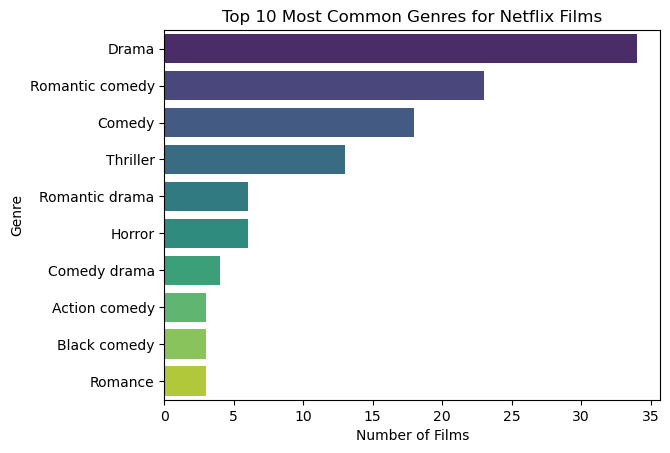

In [4]:
# What are the most common genres for Netflix films?
top_genres = df["Genre"].value_counts().head(10)#organzies theme by Genre
sns.barplot(x=top_genres.values, y=top_genres.index, palette="viridis") #This uses a different palette color using sns
plt.xlabel("Number of Films") 
plt.ylabel("Genre")
plt.title("Top 10 Most Common Genres for Netflix Films")
plt.show()


It appears that Drama  and Romantic Comedy are the most common genres for Netflix films, while Comedy, Thriller, Romance Drama, etc are on the lower end as they don't seemingly have the same appeal as the other ones on the platform during 2022. There's not much of a difference here between 2023 and 2022.

Here I'm answering the question, "What are the most common genres for Netflix films?" I'll be using a graph to display the top 5 most common language for Netflix films


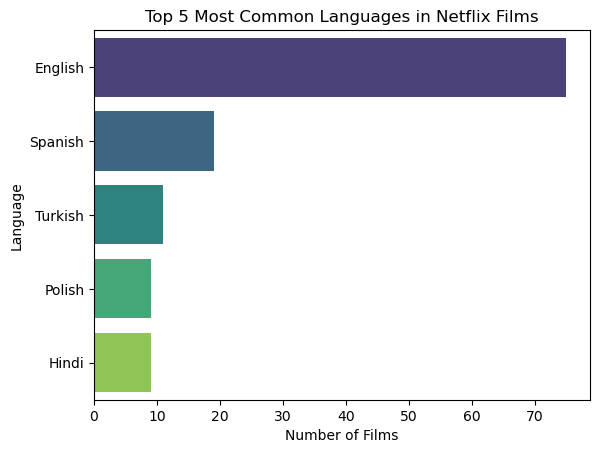

In [5]:
# What are the top 5 languages most commonly used in Netflix films?
top_languages = df["Language"].value_counts().head(5) #This grabs the lanuages and makes it to be the top 5 that are diaplayed
sns.barplot(x=top_languages.values, y=top_languages.index, palette="viridis") #use sns to change the color of the graph to be more appealing
plt.xlabel("Number of Films") #This gathers the overall amount of films
plt.ylabel("Language") 
plt.title("Top 5 Most Common Languages in Netflix Films")
plt.show()

It appears that the most common language is English for Netflix films, followed by Spanish, Turkish, Polish, and Hindi, even during 2022 it appears that the majority of films were in English, while every other language wasn't as prominent.

The question I'm going to be answering here is "How has the number of Netflix films released each month changed over time?
" This should help us deteremine if the number of films increases or decrease for Netflix as of 2022.

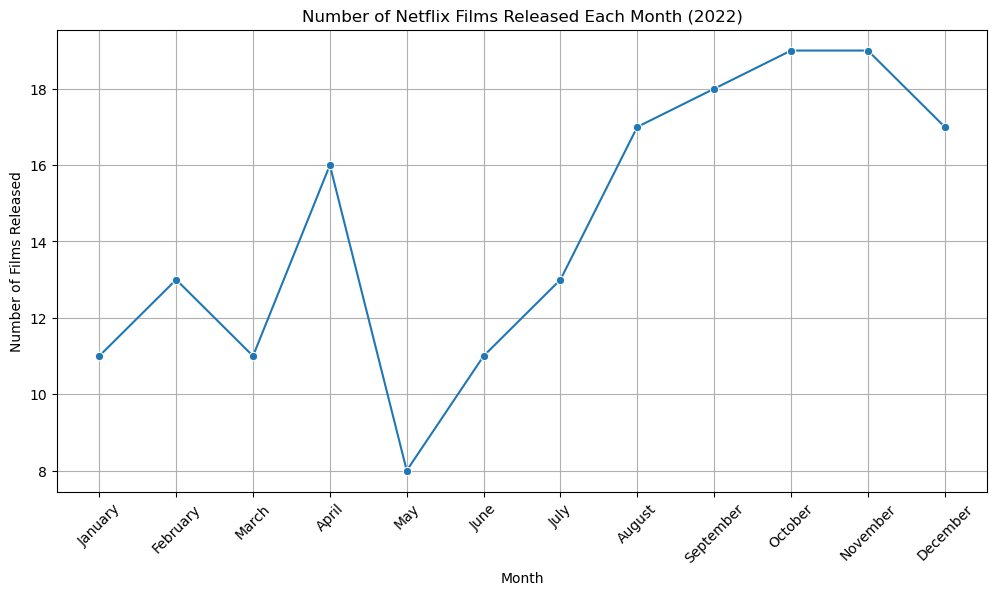

In [9]:
# I'm defining the order of the months here since I ran into an issue in which it was all scrambled 
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# This helps to convert the 'Month' column to categorical with the correct order
df['Month'] = pd.Categorical(df['Month'], categories=months_order, ordered=True)

# How has the number of Netflix films released each month changed over time?
monthly_counts = df['Month'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_counts.index, y=monthly_counts.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Number of Films Released')
plt.title('Number of Netflix Films Released Each Month (2022)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

It appears that the month with the most films released during October and November, it started with a slow incline from January to Februart, it dropped down during March but went up to 16 during April and back to 0 during May. It then slowly increased as the months went on and dropped a bit during December.

The question being answered here is "What are the top 5 Netflix films with the longest runtime?" I'll be using the runtime for the films to determine the answer for this one.

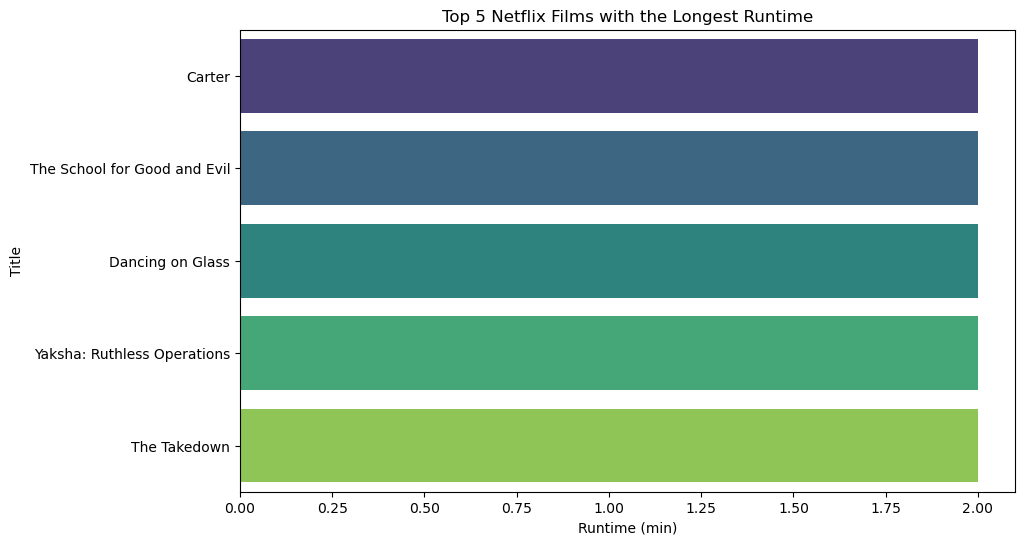

Top 5 Netflix films with the longest runtime:
                            Title     Runtime
86                         Carter  2 h 14 min
126  The School for Good and Evil  2 h 28 min
39               Dancing on Glass  2 h 19 min
41    Yaksha: Ruthless Operations   2 h 5 min
52                   The Takedown   2 h 1 min


In [7]:
#What are the top 5 Netflix films with the longest runtime?
top_longest_films = df.sort_values(by='Runtime (min)', ascending=False).head(5)

#I create a simple graph which only displays the top 5 longest running films to appear on, it doesn't exactly display the actual amount since i'd probably would need to do more just to make it work,
plt.figure(figsize=(10, 6))
sns.barplot(x='Runtime (min)', y='Title', data=top_longest_films, palette='viridis', order=top_longest_films['Title'])
plt.xlabel('Runtime (min)')
plt.ylabel('Title')
plt.title('Top 5 Netflix Films with the Longest Runtime')
plt.show()

# This only prints/displays the length of each of the films, this was on the simplier side to create.
top_longest_films = df.sort_values(by='Runtime (min)', ascending=False).head(5)
print("Top 5 Netflix films with the longest runtime:")
print(top_longest_films[['Title', 'Runtime']])

It appears that The School For Good and Evil is the longest running film as of 2022 on Netflix, followed by The Dancing on Glass, Carter, Yaksha: Ruthless Operations, and The Takedown.

This was just a random additonal one I included just for testing out a differnt type of plotting, this is not part of the 4 main questions i went out to answer, the question being asnwer is "Does Lnauage and genre have anything to do with the films?"

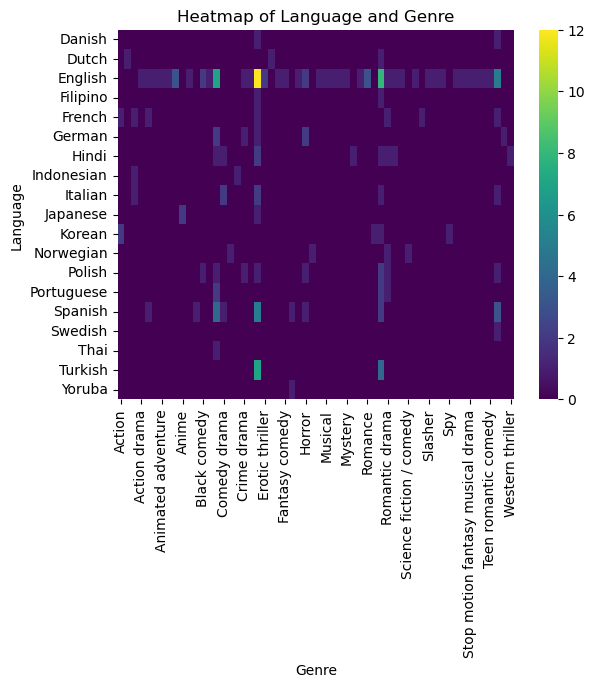

In [8]:
# Does language and genre have anything to do with films?
language_genre_cross = df.groupby(["Language", "Genre"]).size().unstack(fill_value=0)
sns.heatmap(language_genre_cross, cmap="viridis")
plt.xlabel("Genre")
plt.ylabel("Language")
plt.title("Heatmap of Language and Genre")
plt.show()

It appears that for the most part genre and films do not relate to each other as much as I previosuly thought, though it does appear that English and Erotic Thriller films go in and hand as they do appear to have a close relatiionship for 2022